# Sequential Model Analysis with mean length for embedding dimension

In [0]:
import pickle
import matplotlib.pyplot as plt

In [0]:
with open('Waze-Data-Sequences-with-Radius.pickle', 'rb') as f:
  event_list, df = pickle.load(f)

In [3]:
event_list

{1: 'minor accident',
 2: 'other',
 3: 'road closed',
 4: 'stopped car on the shoulder',
 5: 'traffic jam',
 6: 'major event',
 7: 'pothole',
 8: 'missing sign on the shoulder',
 9: 'stopped car',
 10: 'hazard on the shoulder',
 11: 'accident',
 12: 'flooding',
 13: 'road construction',
 14: 'stopped traffic',
 15: 'object on roadway',
 16: 'animal struck',
 17: 'heavy traffic',
 18: 'small traffic jam',
 19: 'slowdown',
 20: 'animal on the shoulder',
 21: 'large traffic jam',
 22: 'traffic heavier than normal',
 23: 'malfunctioning traffic light',
 24: 'medium traffic jam',
 25: 'hazard on road',
 26: 'weather hazard',
 27: 'road closed due to construction',
 28: 'hail',
 29: 'ice on roadway',
 30: 'fog',
 31: 'huge traffic jam',
 32: 'road closed due to hazard'}

In [4]:
df.head()

,label,events
0,1,"[stopped car on the shoulder, stopped car on t..."
1,1,"[traffic jam, traffic jam, traffic jam, medium..."
2,1,[stopped car on the shoulder]
3,1,"[slowdown, stopped car on the shoulder, major ..."
4,1,"[stopped car on the shoulder, stopped car on t..."


In [5]:
df.tail()

,label,events
66681,0,"[traffic jam, traffic jam, traffic jam, traffi..."
66682,0,[traffic jam]
66683,0,[stopped car on the shoulder]
66684,0,"[road closed due to construction, traffic jam,..."
66685,0,"[traffic jam, traffic jam]"


In [6]:
len(df)

66686

In [7]:
df['label'].value_counts()

0    33758
1    32928
Name: label, dtype: int64

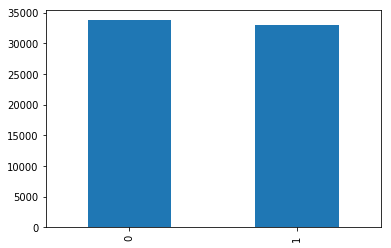

In [8]:
df['label'].value_counts().plot(kind='bar')

In [0]:
df0=df[df['label'] == 0]

In [0]:
df0.reset_index(drop=True, inplace=True)

In [11]:
len(df0)

33758

In [12]:
df0.head()

,label,events
0,0,"[traffic jam, traffic jam]"
1,0,"[stopped car on the shoulder, stopped car on t..."
2,0,[heavy traffic]
3,0,[stopped car on the shoulder]
4,0,[traffic jam]


In [0]:
df1=df[df['label'] == 1]

In [0]:
df1.reset_index(drop=True, inplace=True)

In [15]:
len(df1)

32928

In [0]:
sampdf0=df0.sample(n=len(df1), random_state=12)

In [17]:
sampdf0.head()

,label,events
19926,0,"[traffic jam, traffic jam, malfunctioning traf..."
30730,0,"[stopped traffic, heavy traffic, heavy traffic..."
13265,0,"[object on roadway, traffic heavier than norma..."
20329,0,"[traffic jam, traffic jam, traffic jam, traffi..."
1228,0,"[stopped car on the shoulder, stopped traffic,..."


In [18]:
sampdf0.reset_index(inplace=True, drop=True)
sampdf0.head()

,label,events
0,0,"[traffic jam, traffic jam, malfunctioning traf..."
1,0,"[stopped traffic, heavy traffic, heavy traffic..."
2,0,"[object on roadway, traffic heavier than norma..."
3,0,"[traffic jam, traffic jam, traffic jam, traffi..."
4,0,"[stopped car on the shoulder, stopped traffic,..."


In [0]:
df=df1.append(sampdf0, ignore_index=True)

In [20]:
df.head()

,label,events
0,1,"[stopped car on the shoulder, stopped car on t..."
1,1,"[traffic jam, traffic jam, traffic jam, medium..."
2,1,[stopped car on the shoulder]
3,1,"[slowdown, stopped car on the shoulder, major ..."
4,1,"[stopped car on the shoulder, stopped car on t..."


In [21]:
df.tail()

,label,events
65851,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
65852,0,[traffic jam]
65853,0,"[heavy traffic, traffic jam, traffic jam, traf..."
65854,0,[traffic jam]
65855,0,"[traffic jam, traffic jam]"


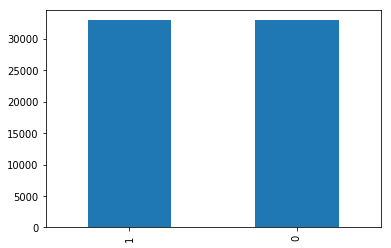

In [22]:
df['label'].value_counts().plot(kind='bar')

In [23]:
df['label'].value_counts()

1    32928
0    32928
Name: label, dtype: int64

In [24]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

46357

In [25]:
df.events.apply(len).idxmax()

46357

In [26]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'stopped traffic',
 'traffic jam',
 'traffic jam',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulder',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'pothole',
 'pothole',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulde

In [27]:
maxlen = len(max_len_event.events)
maxlen

107

In [0]:
reversed_dict = {}
for k, v in event_list.items():
  reversed_dict[v] = k

In [29]:
reversed_dict

{'accident': 11,
 'animal on the shoulder': 20,
 'animal struck': 16,
 'flooding': 12,
 'fog': 30,
 'hail': 28,
 'hazard on road': 25,
 'hazard on the shoulder': 10,
 'heavy traffic': 17,
 'huge traffic jam': 31,
 'ice on roadway': 29,
 'large traffic jam': 21,
 'major event': 6,
 'malfunctioning traffic light': 23,
 'medium traffic jam': 24,
 'minor accident': 1,
 'missing sign on the shoulder': 8,
 'object on roadway': 15,
 'other': 2,
 'pothole': 7,
 'road closed': 3,
 'road closed due to construction': 27,
 'road closed due to hazard': 32,
 'road construction': 13,
 'slowdown': 19,
 'small traffic jam': 18,
 'stopped car': 9,
 'stopped car on the shoulder': 4,
 'stopped traffic': 14,
 'traffic heavier than normal': 22,
 'traffic jam': 5,
 'weather hazard': 26}

In [0]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [31]:
map_event_list_to_idxs(max_len_event.events)

[17,
 17,
 17,
 17,
 4,
 4,
 17,
 17,
 5,
 5,
 14,
 14,
 5,
 5,
 5,
 5,
 17,
 17,
 4,
 4,
 5,
 5,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 7,
 7,
 14,
 14,
 14,
 14,
 5,
 5,
 17,
 17,
 5,
 5,
 14,
 14,
 17,
 17,
 17,
 17,
 17,
 17,
 4,
 4,
 4,
 4,
 22,
 22,
 5,
 5,
 17,
 17,
 17,
 17,
 17,
 17,
 22,
 22,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 19,
 19,
 17,
 17,
 17,
 17,
 14,
 14,
 14,
 14,
 22,
 22,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 17]

In [32]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [33]:
len(event_list)

32

In [34]:
df.events.apply(map_event_list_to_idxs)

0                                                   [4, 4]
1                        [5, 5, 5, 24, 18, 14, 19, 14, 17]
2                                                      [4]
3        [19, 4, 6, 9, 17, 18, 14, 4, 14, 14, 14, 19, 1...
4                                                [4, 4, 4]
5                 [22, 19, 22, 4, 4, 5, 22, 5, 17, 17, 14]
6        [22, 19, 22, 4, 4, 5, 22, 5, 17, 17, 14, 1, 14...
7        [22, 4, 4, 5, 22, 5, 17, 17, 14, 1, 14, 4, 14,...
8                          [17, 17, 14, 14, 17, 5, 22, 17]
9        [17, 17, 14, 14, 14, 4, 17, 22, 22, 17, 17, 17...
10             [14, 4, 17, 22, 17, 5, 17, 5, 1, 5, 17, 19]
11                                          [4, 17, 4, 17]
12       [4, 4, 5, 17, 17, 17, 4, 4, 4, 22, 17, 4, 17, ...
13       [4, 22, 22, 17, 4, 5, 4, 17, 22, 17, 5, 17, 17...
14                    [17, 4, 4, 4, 4, 4, 4, 4, 4, 15, 15]
15                                                 [17, 4]
16                        [4, 4, 4, 17, 17, 4, 19, 17, 1

In [35]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[4, 4],
 [5, 5, 5, 24, 18, 14, 19, 14, 17],
 [4],
 [19, 4, 6, 9, 17, 18, 14, 4, 14, 14, 14, 19, 17, 9],
 [4, 4, 4]]

In [0]:
length=[]
for i in range(len(sequences)):
  length.append(len(sequences[i]))

In [38]:
length[:10]

[2, 9, 1, 14, 3, 11, 15, 28, 8, 19]

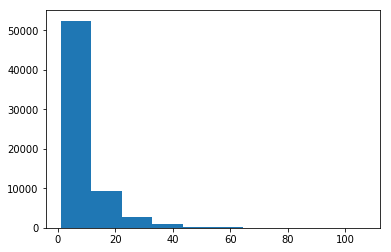

In [41]:
plt.hist(length)
plt.show()

In [0]:
#To make an equal token length for all the sequences
maxlen= 30

In [42]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ...,  0,  4,  4],
       [ 0,  0,  0, ..., 19, 14, 17],
       [ 0,  0,  0, ...,  0,  0,  4],
       ...,
       [ 0,  0,  0, ...,  5,  5,  5],
       [ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  0,  5,  5]], dtype=int32)

In [0]:
labels = np.array(df.label)

In [0]:
np.random.seed(12)

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [49]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  5,  5,  3],
       [ 0,  0,  0, ...,  3,  3,  3],
       ...,
       [ 0,  0,  0, ...,  0,  0,  4],
       [ 0,  0,  0, ...,  5, 13, 22],
       [ 0,  0,  0, ...,  0,  0,  5]], dtype=int32)

In [0]:
num_events = len(event_list) + 1

In [0]:
embedding_dim = 20

In [0]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [53]:
embedding_matrix.shape

(33, 20)

(array([5., 1., 1., 2., 2., 2., 1., 4., 0., 2.]),
 array([0.01982045, 0.09876987, 0.1777193 , 0.25666873, 0.33561816,
        0.41456758, 0.49351701, 0.57246644, 0.65141587, 0.73036529,
        0.80931472]),
 <a list of 10 Patch objects>)

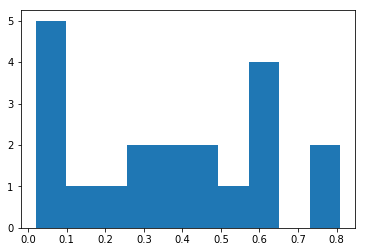

In [55]:
import matplotlib.pyplot as plt
plt.hist(embedding_matrix[0])

In [0]:
embedding_matrix=(embedding_matrix-0.5)*4

(array([5., 1., 1., 2., 2., 2., 1., 4., 0., 2.]),
 array([-1.92071822, -1.60492051, -1.2891228 , -0.97332508, -0.65752737,
        -0.34172966, -0.02593195,  0.28986576,  0.60566347,  0.92146118,
         1.23725889]),
 <a list of 10 Patch objects>)

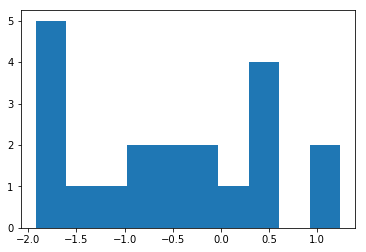

In [57]:
plt.hist(embedding_matrix[0])

### With no Embedding Training

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

In [59]:
model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          660       
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6784      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,477
Trainable params: 7,477
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [0]:
model.layers[0].trainable=True

In [64]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("non_embedding.h5")

Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 105s 2ms/step - loss: 0.5837 - acc: 0.6838 - val_loss: 0.5870 - val_acc: 0.6835
Epoch 2/50
52684/52684 [==============================] - 105s 2ms/step - loss: 0.5783 - acc: 0.6873 - val_loss: 0.5872 - val_acc: 0.6790
Epoch 3/50
52684/52684 [==============================] - 103s 2ms/step - loss: 0.5764 - acc: 0.6908 - val_loss: 0.5844 - val_acc: 0.6866
Epoch 4/50
52684/52684 [==============================] - 104s 2ms/step - loss: 0.5745 - acc: 0.6929 - val_loss: 0.5867 - val_acc: 0.6900
Epoch 5/50
52684/52684 [==============================] - 103s 2ms/step - loss: 0.5739 - acc: 0.6946 - val_loss: 0.5828 - val_acc: 0.6864
Epoch 6/50
52684/52684 [==============================] - 104s 2ms/step - loss: 0.5728 - acc: 0.6945 - val_loss: 0.5828 - val_acc: 0.6893
Epoch 7/50
52684/52684 [==============================] - 103s 2ms/step - loss: 0.5716 - acc: 0.6950 - val_loss: 0.5823 - 

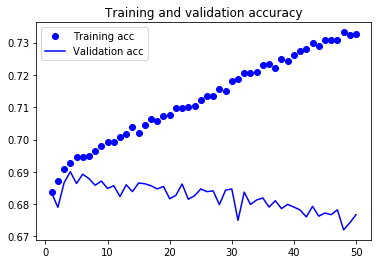

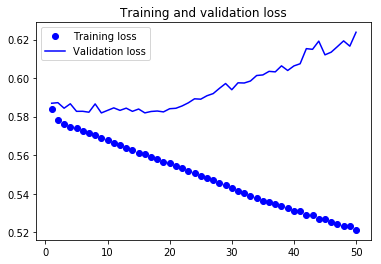

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
with dropout

### With Embedding Training

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

In [67]:
model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [70]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("non_embedding.h5")

Train on 52684 samples, validate on 13172 samples
Epoch 1/20
52684/52684 [==============================] - 120s 2ms/step - loss: 0.6003 - acc: 0.6717 - val_loss: 0.5922 - val_acc: 0.6787
Epoch 2/20
52684/52684 [==============================] - 119s 2ms/step - loss: 0.5831 - acc: 0.6840 - val_loss: 0.5893 - val_acc: 0.6843
Epoch 3/20
52684/52684 [==============================] - 118s 2ms/step - loss: 0.5794 - acc: 0.6892 - val_loss: 0.5855 - val_acc: 0.6803
Epoch 4/20
52684/52684 [==============================] - 117s 2ms/step - loss: 0.5781 - acc: 0.6891 - val_loss: 0.5832 - val_acc: 0.6877
Epoch 5/20
52684/52684 [==============================] - 118s 2ms/step - loss: 0.5765 - acc: 0.6914 - val_loss: 0.5834 - val_acc: 0.6904
Epoch 6/20
52684/52684 [==============================] - 118s 2ms/step - loss: 0.5761 - acc: 0.6915 - val_loss: 0.5820 - val_acc: 0.6899
Epoch 7/20
52684/52684 [==============================] - 118s 2ms/step - loss: 0.5755 - acc: 0.6913 - val_loss: 0.5828 - 

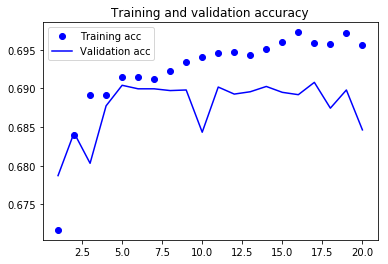

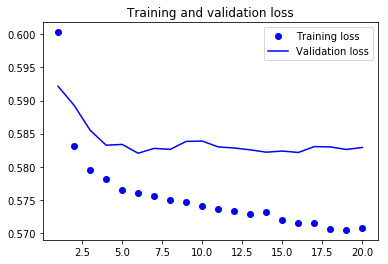

In [71]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()